# Problem Statement 
use relevant machine learning model to predict whether person is diabetic or non diabetic

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# load the data
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# outcome is target variable 
# 1-diabetic
# 0-nondiabetic

# Basic checks

In [4]:
# check no of rows and columns
data.shape

(768, 9)

In [5]:
# print first 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# print last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
# print all the columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# check data type of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
# check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
# find unique values in outcome 
data.Outcome.unique()

array([1, 0], dtype=int64)

In [11]:
# find count of diabetic and non diabetic
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
# statistical analysis
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
# check for missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory data analysis

# Univariate 
* his plot is used to check for distribution
* count plot is used to check whether data is balanced or not

<Axes: xlabel='Outcome', ylabel='count'>

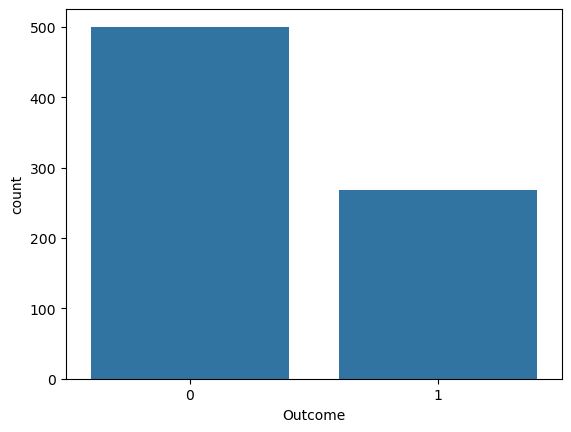

In [15]:
# check whether data is balanced or not 
# databalanced: Equal number of records related to diabetic and non diabetic patients.
sns.countplot(x=data.Outcome)

In [16]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [21]:
# check for distribution data

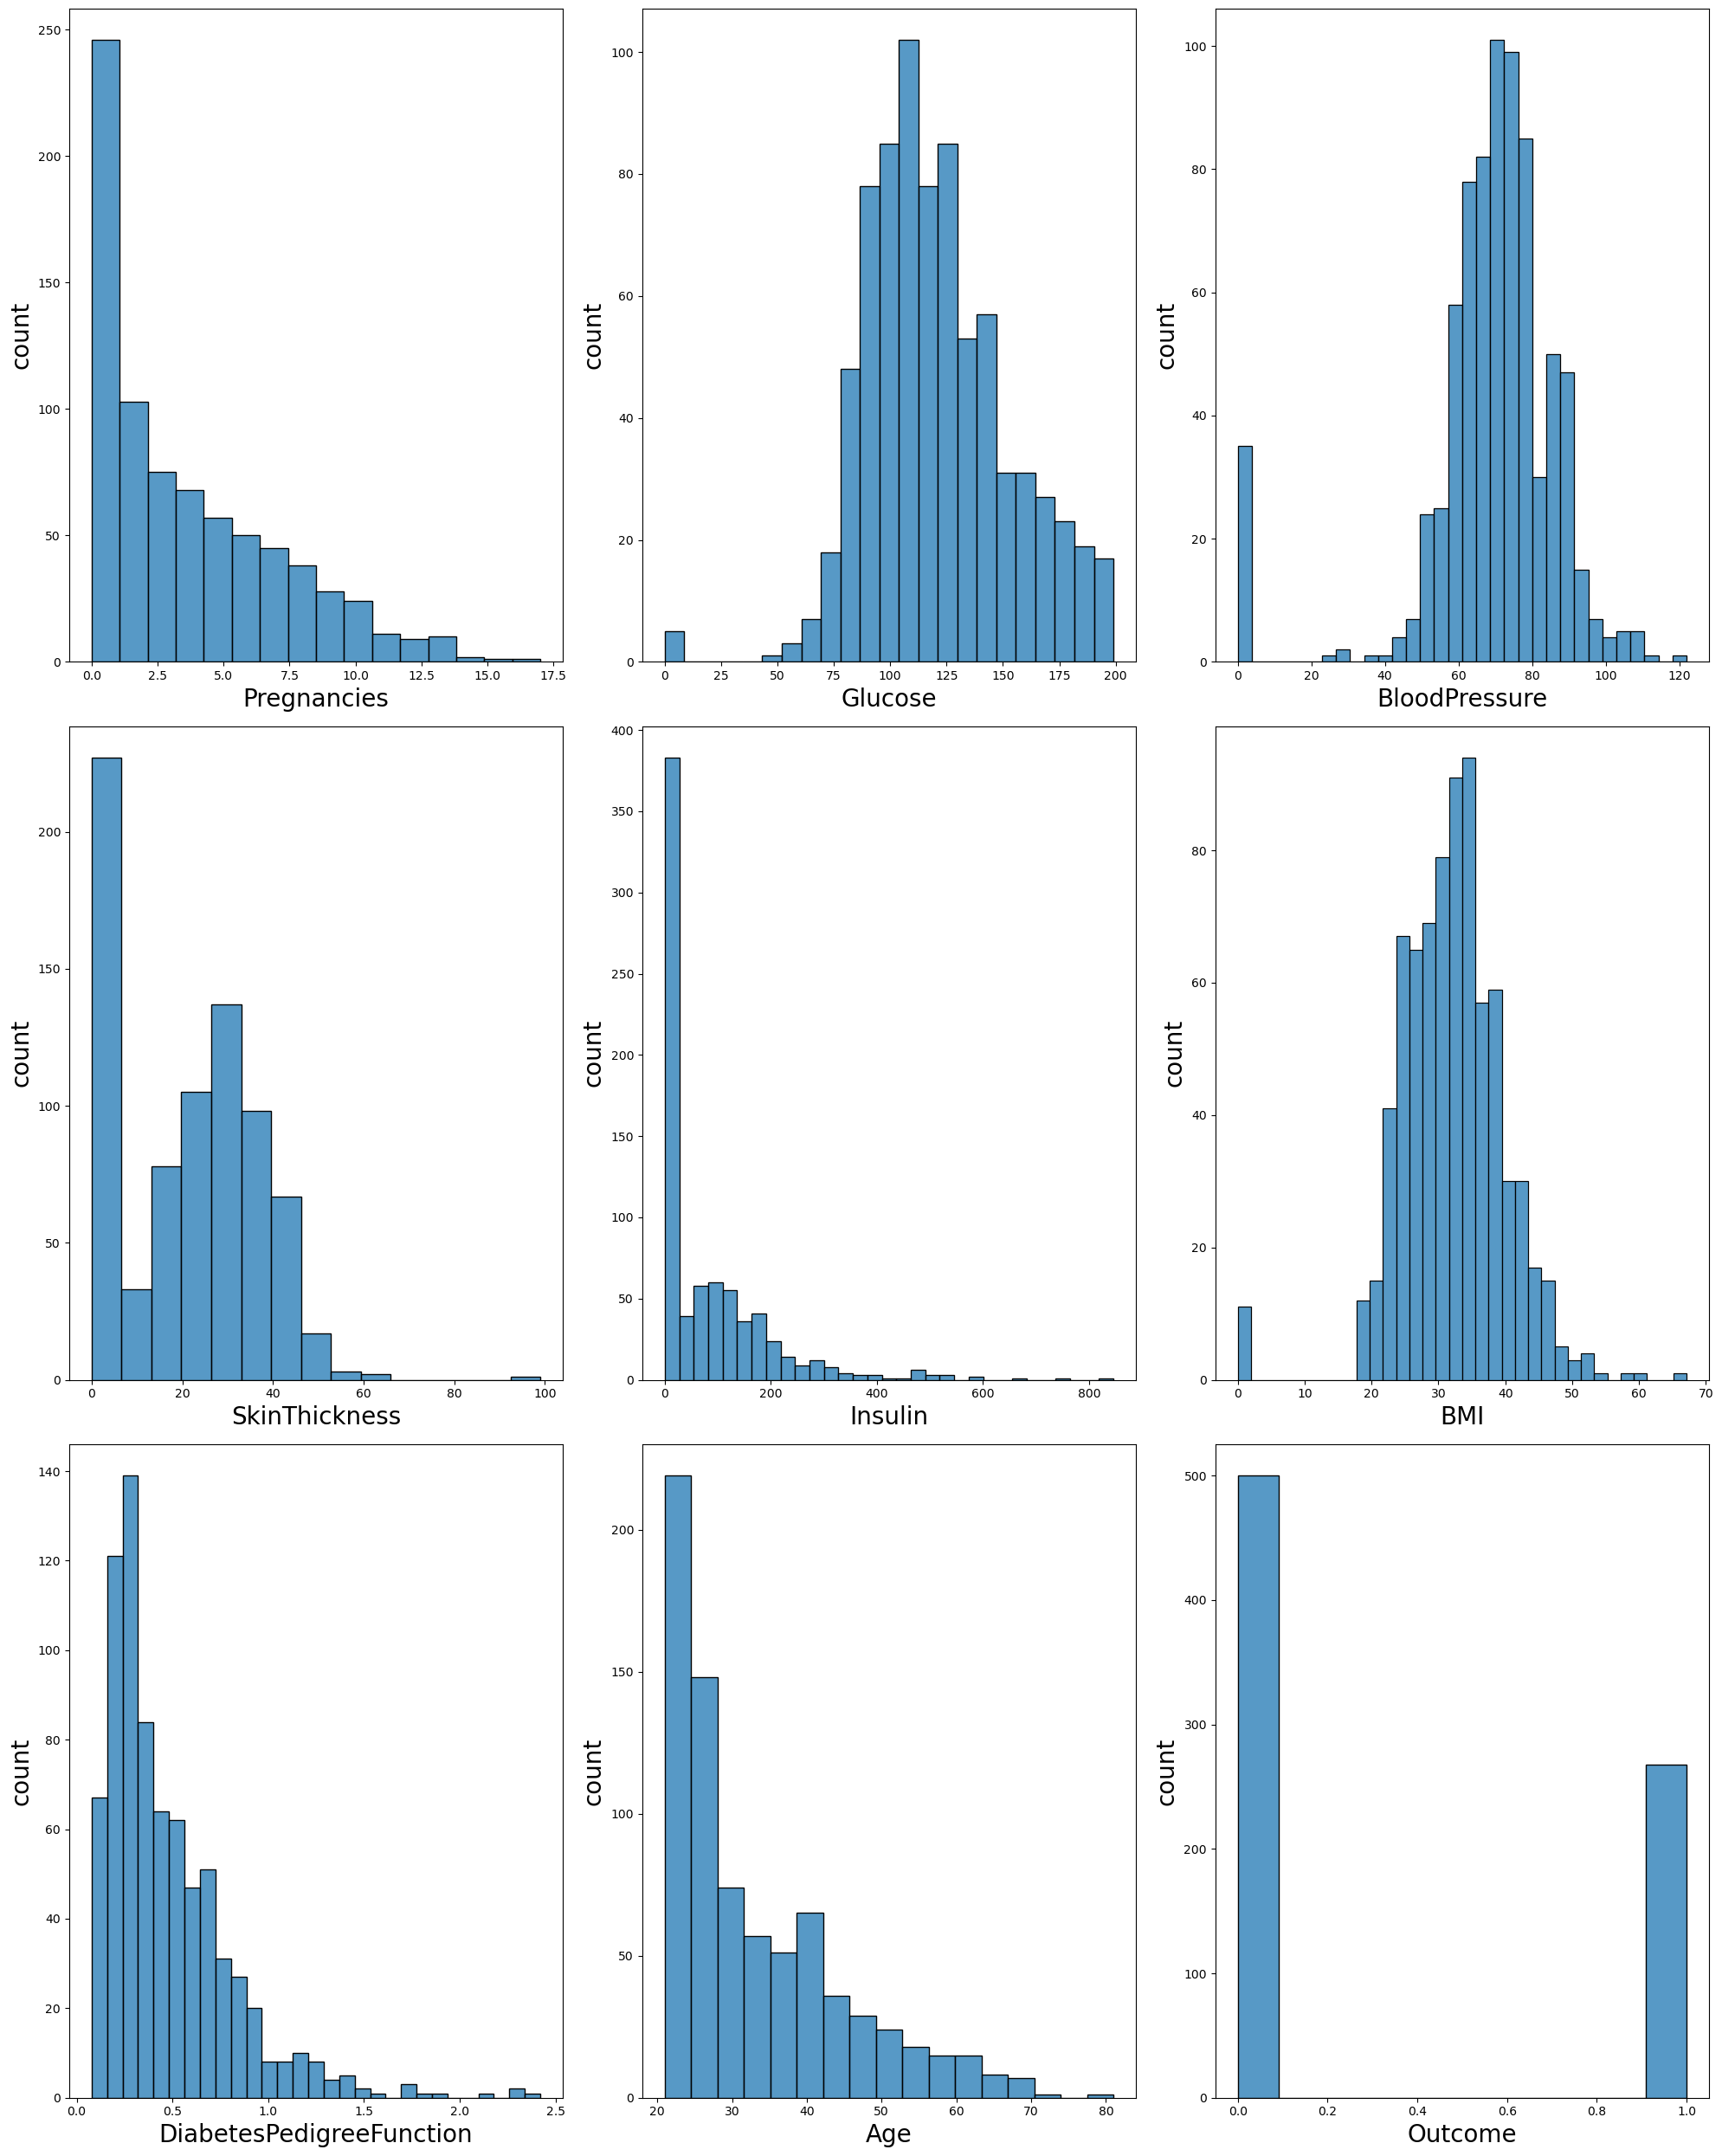

In [30]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plotnumber+=1
plt.tight_layout()

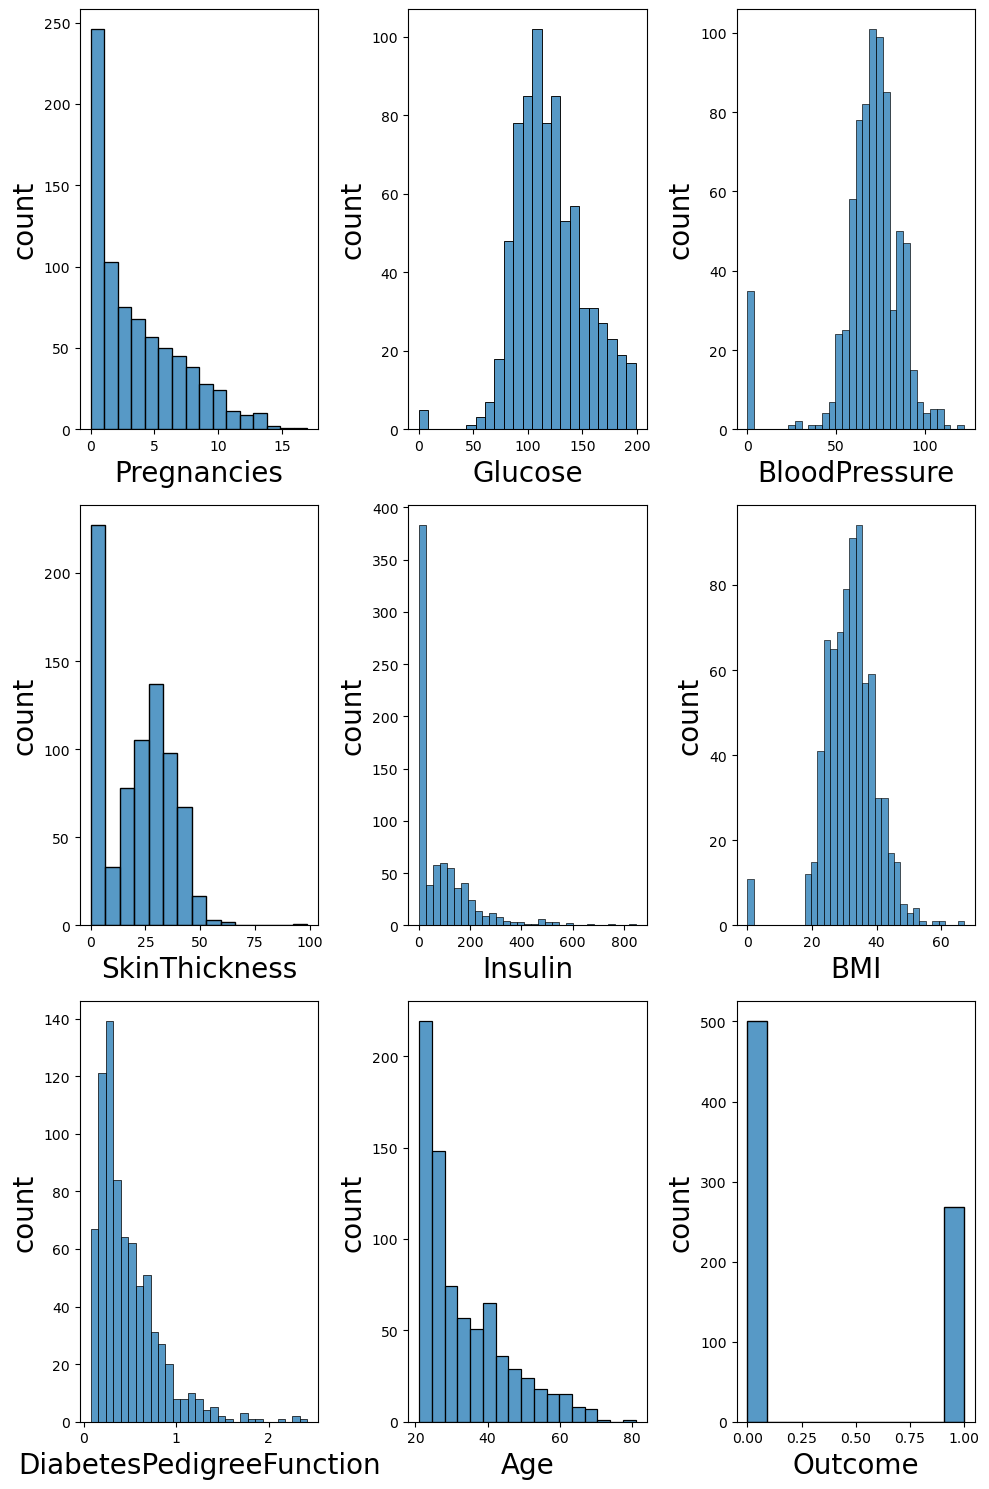

In [31]:
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [26]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Bivariate 

<Axes: xlabel='Pregnancies', ylabel='count'>

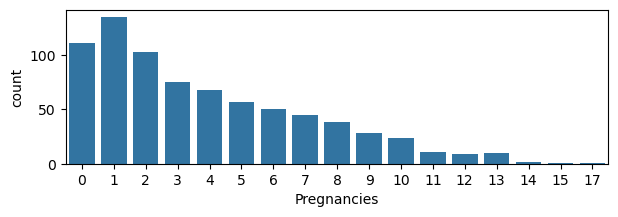

In [36]:
# Analyse how pregnancies will import diabetes
plt.figure(figsize=(7,2))
sns.countplot(data=data,x='Pregnancies')

<Axes: xlabel='Pregnancies', ylabel='count'>

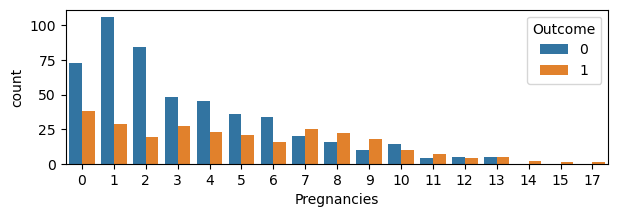

In [39]:
# Analyse how pregnancies will import diabetes
plt.figure(figsize=(7,2))
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

<Axes: xlabel='Glucose', ylabel='Count'>

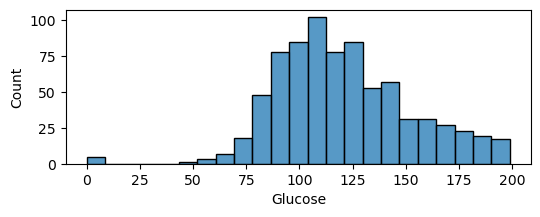

In [41]:
# Analyse relationship between glucose and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Glucose')

<Axes: xlabel='Glucose', ylabel='Count'>

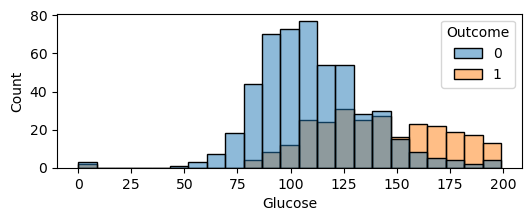

In [42]:
# Analyse relationship between glucose and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Glucose',hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

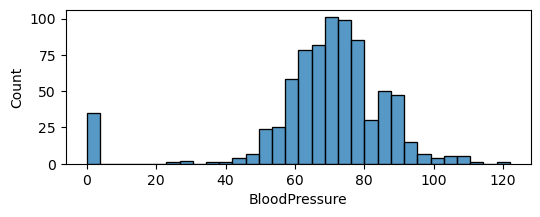

In [45]:
# Analyse relationship between and bloodpressure and diabetes
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BloodPressure')

<Axes: xlabel='BloodPressure', ylabel='Count'>

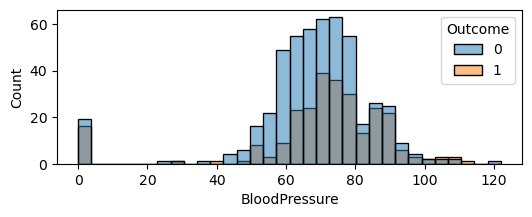

In [46]:
# Analyse relationship between and bloodpressure and diabetes
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='BloodPressure',hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Count'>

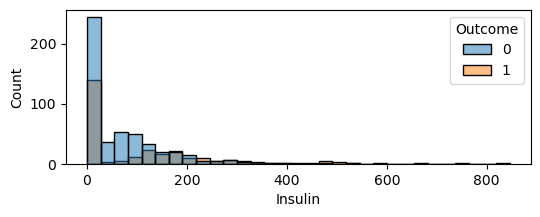

In [47]:
# Analyse relationship between Insulin and diabetic
plt.figure(figsize=(6,2))
sns.histplot(data=data,x='Insulin',hue='Outcome')